In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
train = pd.read_csv('C:\\Users\\Kalpit Bhardwaj\\Desktop\\DATA SCIENCE\\projects\\train.csv')

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


<AxesSubplot:>

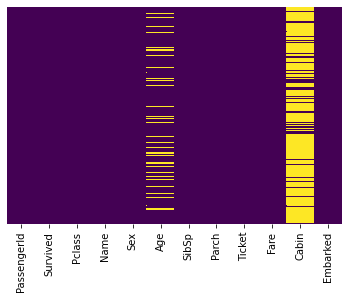

In [7]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [8]:
sns.set_style('whitegrid')

<AxesSubplot:xlabel='Survived', ylabel='count'>

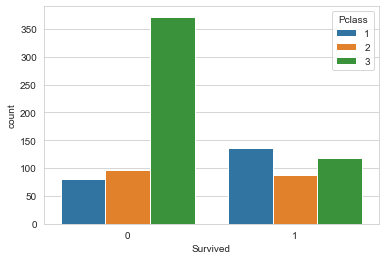

In [9]:
sns.countplot(data=train,x='Survived',hue='Pclass')

C:\Users\Kalpit Bhardwaj\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

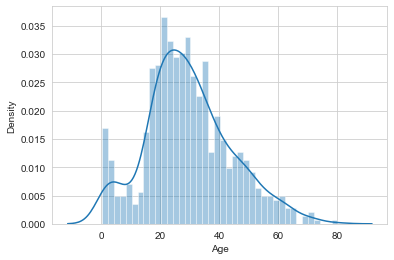

In [10]:
sns.distplot(train['Age'].dropna(),bins=40)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

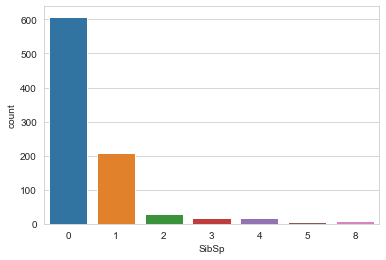

In [11]:
sns.countplot(data=train,x='SibSp')

<AxesSubplot:>

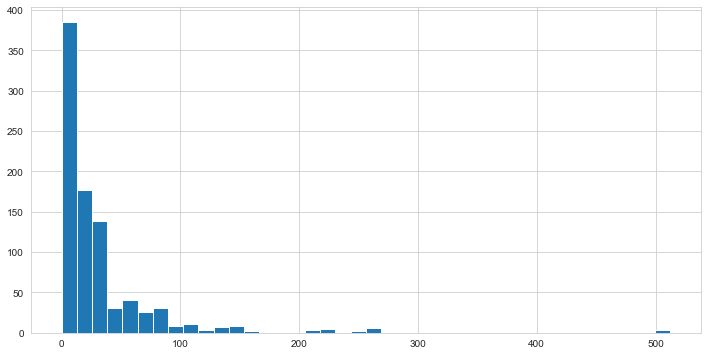

In [12]:
train['Fare'].hist(bins=40,figsize=(12,6))

In [14]:
train.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


<AxesSubplot:>

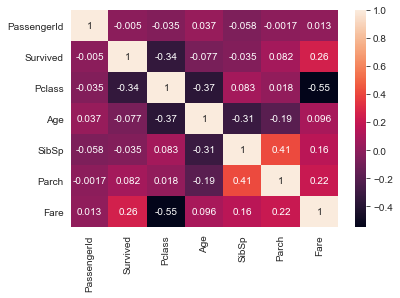

In [15]:
sns.heatmap(train.corr(),annot=True)

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

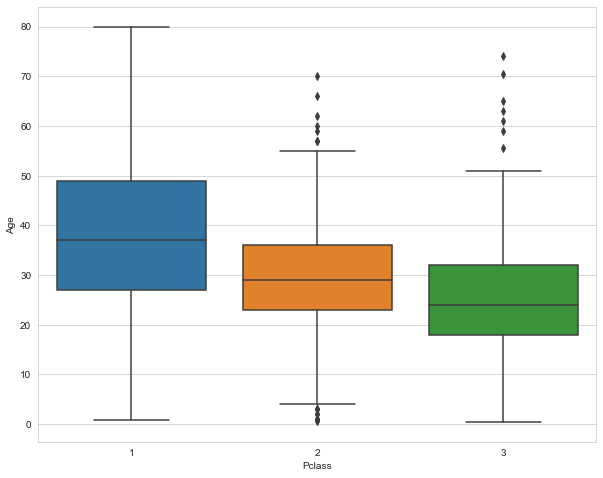

In [16]:

plt.figure(figsize=(10,8))
sns.boxplot(x='Pclass', y='Age',data=train)

In [17]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass ==2:
            return 29
        else:
            return 24
    else:
        return Age

In [19]:
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)

In [20]:
del train['Cabin']

In [21]:

train.dropna(inplace=True)

<AxesSubplot:>

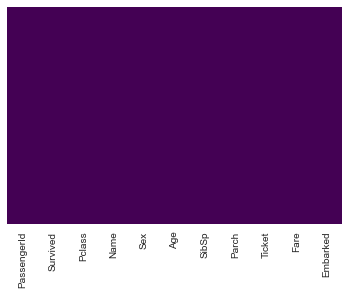

In [22]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')


In [23]:
sex = pd.get_dummies(train['Sex'],drop_first=True)

In [24]:
embark = pd.get_dummies(train['Embarked'],drop_first=True)

In [25]:
train = pd.concat([train,sex,embark],axis=1)

In [26]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1


In [27]:

train.drop(['Sex','Name','Embarked','Ticket'],inplace=True,axis=1)

In [28]:

train.drop('PassengerId',axis=1,inplace=True)

In [29]:

train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [30]:
Class = pd.get_dummies(train['Pclass'],drop_first=True)

In [31]:
Class.head()

,2,3
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1


In [33]:
test = pd.read_csv('C:\\Users\\Kalpit Bhardwaj\\Desktop\\DATA SCIENCE\\projects\\test.csv')

<AxesSubplot:>

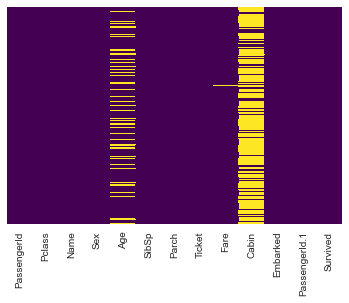

In [34]:
sns.heatmap(test.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [35]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [36]:

X = train.drop('Survived',axis=1)
y = train['Survived']

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=50)

In [39]:
from sklearn.linear_model import LogisticRegression

In [40]:
lg = LogisticRegression()

In [41]:

lg.fit(X_train,y_train)

C:\Users\Kalpit Bhardwaj\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [42]:
predictions = lg.predict(X_test)

In [43]:

from sklearn.metrics import classification_report

In [44]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.82      0.89      0.85       163
           1       0.80      0.69      0.74       104

    accuracy                           0.81       267
   macro avg       0.81      0.79      0.80       267
weighted avg       0.81      0.81      0.81       267



In [45]:
from sklearn.metrics import confusion_matrix

In [46]:
confusion_matrix(y_test,predictions)

array([[145,  18],
       [ 32,  72]], dtype=int64)